In [190]:
#Die ganzen packages die für den versuch verwendet werden

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt
from scipy.stats import linregress

import pandas as pd #Um die Spektroskopie daten zu lesen

# Wellenoptik

## Beugung am Einzelspalt

Es wird die Beugung von monochromatischem Licht an einem Einzelspalt untersucht, um dessen Spaltbreite zu bestimmen.  

### Durchführung und Versuchsaufbau  

Ein Diodenlaser mit einer Wellenlänge von 635 nm beleuchtet senkrecht einen schmalen Einzelspalt.  
Das entstehende Beugungsbild wird auf einem Schirm projiziert und die Abstände der Intensitätsminima zur zentralen Hauptmaxima werden mit einem Lineal gemessen.  
Aus den Winkeln der Minima, berechnet nach der Beziehung  

$$
b \, \sin(\alpha_{\text{min},n}) = n \lambda,
$$  

wird die Spaltbreite $b$ durch lineare Regression bestimmt.  
Zur Minimierung von Nullpunktfehlern werden symmetrisch angeordnete Minima gleicher Ordnung gemessen und ihr Abstand halbiert.  

### Auflösung bzw. Unsicherheit der Messgeräte:

* Längenmessung: ± 0.5 mm  

### Erläuterung der systematischen (Typ-B) Unsicherheit der Messwerte:

Unsicherheiten entstehen durch ungenaue Justierung des Spaltes und der Schirmposition.  
Parallaxenfehler beim Ablesen sowie leichte Verzerrungen des Beugungsbildes durch unebene Schirmflächen können die Messung beeinflussen.  

### Ergebnisse

<IPython.core.display.Latex object>

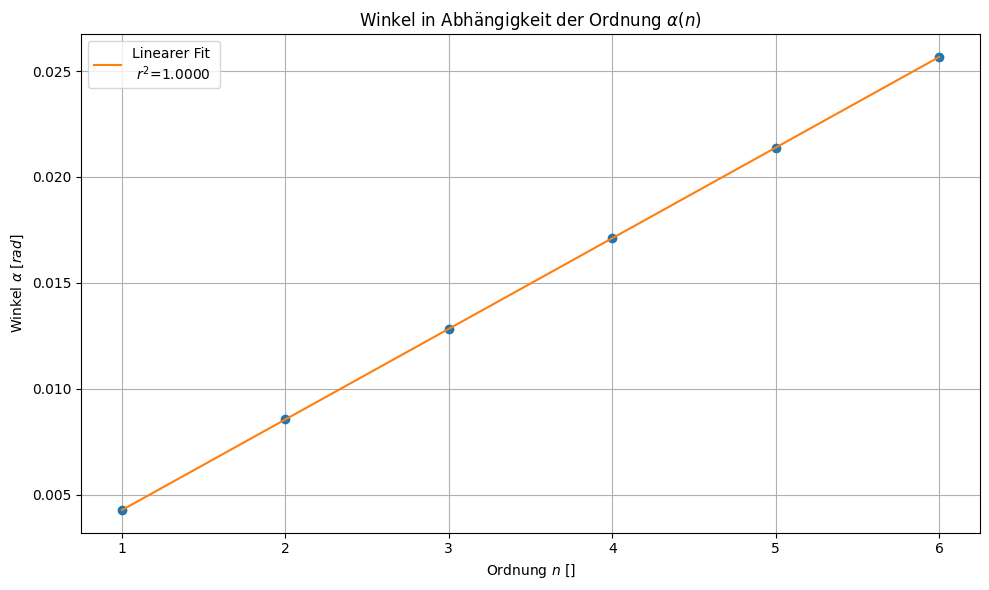

<IPython.core.display.Latex object>

In [191]:
# konstante wellenlänge lambda
λ = 635 # in nm

u = 0.5 #unsicherheit der längenmessung

#abstände der minima zueinander
d = unp.uarray([8, 16, 24, 32, 40, 48], u)/2 # in mm
a = ufloat(935, u) # in mm

n = np.array([i  for i in range(1,len(d)+1)])
winkel = unp.arctan(d/a)#*180 / np.pi       #muss in rad sein, sonst funktioniert abschätzung nicht


table = r"""$$
\begin{array}{c|c}
n\lambda~\mathrm[nm] & \alpha ~\mathrm[°]  \\ \hline \\
"""
for i, (nlambda,alpha) in enumerate(zip(n*λ, winkel*(180 / np.pi))):
    table += rf"\mathrm{{{nlambda}}} & ({unp.nominal_values(alpha):.2f}\pm{unp.std_devs(alpha):.2f}) \\ "
table += r"\end{array}$$"

display(Latex(table))

res = linregress(n,unp.nominal_values(winkel))

plt.figure(figsize=(10, 6))
plt.title(r"Winkel in Abhängigkeit der Ordnung $\alpha(n)$")
plt.plot(n,unp.nominal_values(winkel), 'o')
plt.plot(n, res.slope*n + res.intercept, label=f"Linearer Fit \n $r^2$={res.rvalue**2:.4f}")
plt.ylabel(r"Winkel $ \alpha ~ [rad]$")
plt.xlabel("Ordnung $n ~ []$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

slope = ufloat(res.slope, res.stderr)
b = (λ/slope)*1e-6 #nm --> mm

display(Latex(fr"$$b = ({unp.nominal_values(b):.2f}\pm {unp.std_devs(b):.2f}) ~ nm $$"))

### Diskussion

muss noch geschrieben werden

## Beugung am Doppelspalt

Bei diesem Versuch wird das Interferenzmuster eines Doppelspalts untersucht, um Spaltbreite und Spaltabstand zu bestimmen.  

### Durchführung und Versuchsaufbau  

Ein Diodenlaser ($\lambda = 635\,\text{nm}$) beleuchtet einen symmetrisch ausgerichteten Doppelspalt.  
Das entstehende Beugungs- und Interferenzmuster wird auf einem Schirm aufgefangen.  
Die Positionen der Maxima und Minima werden gemessen, um zunächst die Spaltbreite $b$ analog zum Einzelspalt zu bestimmen.  
Anschließend wird der Spaltabstand $g$ durch Zählen der Maxima zweiter Ordnung innerhalb des zentralen Maximums und Anwendung der Beziehung  

$$
g \, \sin(\alpha_{\text{max},k}) = k \lambda
$$  

ermittelt.  

### Auflösung bzw. Unsicherheit der Messgeräte:

* Lineal: ± 0.5 mm   

### Erläuterung der systematischen (Typ-B) Unsicherheit der Messwerte:

Fehlerquellen ergeben sich durch ungenaue Symmetrie der Spaltbeleuchtung oder geringfügige Verschiebung des Doppelspalts.  
Auch nicht-paralleler Schirme oder Unebenheiten im Papier können die gemessenen Abstände der Maxima verfälschen.  

### Ergebnisse


In [192]:
# konstante wellenlänge lambda
λ = 635 # in nm

u = 0.5 #unsicherheit der längenmessung

#abstände der minima zueinander
d = unp.uarray([8, 16, 24, 32, 40, 48], u)/2 # in mm
a = ufloat(935, u) # in mm

n = np.array([i  for i in range(1,len(d)+1)])
winkel = unp.arctan(d/a)#*180 / np.pi       #muss in rad sein, sonst funktioniert abschätzung nicht


table = r"""$$
\begin{array}{c|c}
n\lambda~\mathrm[nm] & \alpha ~\mathrm[°]  \\ \hline \\
"""
for i, (nlambda,alpha) in enumerate(zip(n*λ, winkel*(180 / np.pi))):
    table += rf"\mathrm{{{nlambda}}} & ({unp.nominal_values(alpha):.2f}\pm{unp.std_devs(alpha):.2f}) \\ "
table += r"\end{array}$$"

display(Latex(table))

res = linregress(n,unp.nominal_values(winkel))

#plt.figure(figsize=(10, 6))
#plt.title(r"Winkel in Abhängigkeit der Ordnung $\alpha(n)$")
#plt.plot(n,unp.nominal_values(winkel), 'o')
#plt.plot(n, res.slope*n + res.intercept, label=f"Linearer Fit \n $r^2$={res.rvalue**2:.4f}")
#plt.ylabel(r"Winkel $ \alpha ~ [rad]$")
#plt.xlabel("Ordnung $n ~ []$")
#plt.legend()
#plt.grid()
#plt.tight_layout()
#plt.show()

slope = ufloat(res.slope, res.stderr)
b = (λ/slope)*1e-6 #nm --> mm

display(Latex(fr"$$b = ({unp.nominal_values(b):.2f}\pm {unp.std_devs(b):.2f}) ~ nm $$"))


# anzahl minima 2. ordnung im hauptmaximum
k = ufloat(12, 1) # unsicherheit mindestens 1

g = (k*b)/2


display(Latex(fr"$$g = ({unp.nominal_values(g):.2f}\pm {unp.std_devs(g):.2f}) ~ nm $$"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Diskussion

muss noch geschrieben werden

## Wellenlängenmessung mit dem Gitter

In diesem Experiment wird die Wellenlänge von Licht einer Spektrallampe mittels eines Beugungsgitters bestimmt.  

### Durchführung und Versuchsaufbau  

Ein Beugungsgitter bekannter Gitterkonstante wird in ein Präzisionsgoniometer eingesetzt.  
Licht einer Spektrallampe (z. B. Quecksilber) tritt durch den Kollimatorspalt und wird auf das Gitter gelenkt.  
Mit einem Fernrohr werden die Ablenkwinkel der Spektrallinien 1., 2. und 3. Ordnung gemessen.  
Die Wellenlängen werden aus der Gittergleichung  

$$
g \, \sin(\alpha_{\text{max},k}) = k \lambda
$$  

berechnet und mit Literaturwerten verglichen, um das verwendete Element zu identifizieren.  

### Auflösung bzw. Unsicherheit der Messgeräte:

* Goniometer: ± 1′ (Winkelminute)  
* Gitterkonstante: ± 0.1 %  

### Erläuterung der systematischen (Typ-B) Unsicherheit der Messwerte:

Systematische Unsicherheiten ergeben sich durch Parallaxenfehler beim Ablesen des Nonius sowie ungenaue Justierung von Gitter und Fernrohr.  
Eine nicht exakt zentrierte Lichtquelle oder Streulicht kann zu Abweichungen in den gemessenen Ablenkwinkeln führen. 

### Ergebnisse


In [202]:


g = 1/140    # Gitterkonstante in mm
k = np.array([1, 2, 3])
u = 30 / 60     # Unsicherheit

display(Latex(fr"$$g=1/140~\mathrm{{mm}}$$"))

# Messwerte (rechts, links)
daten = {
    "grün":  ([86.82, 82.45, 76.91], [93.18, 97.55, 103.09]),
    "orange": ([86.57, 82.00, 75.87], [93.43, 98.00, 104.13]),
    "violett": ([87.03, 83.00, 78.30], [92.97, 97.00, 101.70]),
}


λ = {}

for farbe, (rechts, links) in daten.items():
    rechts = unp.uarray(rechts, u)
    links = unp.uarray(links, u)
    winkel = ((links - rechts) / 2) *  np.pi / 180 
    λ[farbe] = (g * unp.sin(winkel)/k) * 1e6          # mm

    # LaTeX-Tabelle
    table = fr"""$$\textbf{{{farbe.capitalize()}}}$$ $$\quad\quad
    \begin{{array}}{{c|c|c}}
    n & \alpha~[^\circ] & \lambda ~\mathrm{{nm}} \\ \hline
    """
    for n, alpha, lambd in zip(k, winkel* 180 / np.pi, λ[farbe]):
        table += rf"{n} & ({unp.nominal_values(alpha):.2f}\pm{unp.std_devs(alpha):.2f}) & {unp.nominal_values(lambd):.0f} \pm {unp.std_devs(lambd):.0f}\\ "

    table += r"\end{array}$$"
    display(Latex(table))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Diskussion

muss noch geschrieben werden